In [41]:
import pandas as pd

df = pd.read_csv("Data/three_col.csv")

In [42]:
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


In [43]:
# standized columns values
cols = df.columns
z_col = []
for i in cols:
    df["z_"+i] = (df[i]-df[i].mean())/df[i].std()
    z_col.append("z_"+i)

    

In [45]:
print(df.head())
z_col

   income  age  days_since_purchase  z_income     z_age  z_days_since_purchase
0   56432   31                  492 -0.606833 -0.748848               0.818321
1  137580   38                  551  1.505879 -0.135469               1.349109
2   68285   59                  304 -0.298237  1.704668              -0.873001
3   93617   51                  507  0.361289  1.003663               0.953267
4  113441   54                  509  0.877413  1.266540               0.971260


['z_income', 'z_age', 'z_days_since_purchase']

In [46]:
from sklearn import cluster
model =  cluster.KMeans(n_clusters=4, random_state=10)
df["cluster"] = model.fit_predict(df[z_col])

In [47]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
df["pc1"], df["pc2"] = zip(*pca.fit_transform(df[z_col])) 

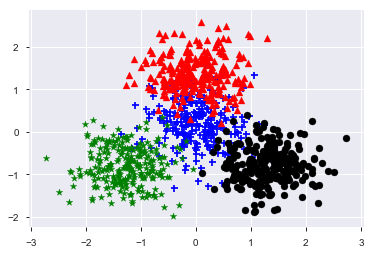

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

color   = ["r","b","k","g"]
markers = ["^","+","o","*"]

for c in df["cluster"].unique():
    d = df[df["cluster"] == c]
    plt.scatter(d["pc1"],d["pc2"], marker =markers[c],
               color = color[c])

plt.show()

In [40]:
for cluster in df["cluster"].unique():
    print("cluster: "+str(cluster))
    for col in ["income","age","days_since_purchase"]:
        print(col+": {:.2f}".format(df.loc[df["cluster"]==cluster,
                                   col].mean()))

cluster: 1
income: 46153.20
age: 29.34
days_since_purchase: 498.19
cluster: 3
income: 113118.22
age: 49.77
days_since_purchase: 502.58
cluster: 2
income: 45002.10
age: 49.49
days_since_purchase: 299.66
cluster: 0
income: 114704.12
age: 29.34
days_since_purchase: 302.92
